#Problem statement

Ставится задача выявления нарушений сна по различным физиологическим параметрам, таких как бессонница и апноэ во сне.

Вход: физиологические параметры (гендер, возраст, профессия, продолжительность сна ч/день, качество сне от 1 до 10, уровень физической активности мин/день, уровень стресса от 1 до 10, индекс массы тела, кровяное давление систолическое и диастолическое, частота сердцебиения, количество шагов в день).

Выход: болезни сна (бессонница, апноэ во сне) или их отсутствие.

#Importing libraries

В данном модуле загружаем все необходимые библиотеки.

In [ ]:
#Reading data
import pandas as pd


#Fixings warnings
import warnings
warnings.filterwarnings('ignore')


#For mathematical operations
import numpy as np


#Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


#Data spliting
from sklearn.model_selection import train_test_split

#Reading data

В данном модуле считываем данные из датасетов, анализируем найденные датасеты.

In [ ]:
lifestyle_sleep_data_1=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset_1.csv')

#head() for display the first 5 rows
lifestyle_sleep_data_1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
lifestyle_sleep_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Первый детасет не содержит пустых ячеек, дозаполнять его не требуется.

In [ ]:
lifestyle_sleep_data_2=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset_2.csv')

#head() for display the first 5 rows
lifestyle_sleep_data_2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
lifestyle_sleep_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
 12  Sleep Disorder           186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


Второй детасет не содержит пустых ячеек, дозаполнять его не требуется.

Теперь объединяем имеющиеся датасеты.

In [ ]:
lifestyle_sleep_data = pd.concat([lifestyle_sleep_data_1, lifestyle_sleep_data_2], axis=0)
lifestyle_sleep_data.shape
lifestyle_sleep_data.drop_duplicates(lifestyle_sleep_data, keep='first', inplace=True)

In [ ]:
print('The dimention of data is :',lifestyle_sleep_data.shape)

The dimention of data is : (559, 13)


In [ ]:
lifestyle_sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                559 non-null    int64  
 1   Gender                   559 non-null    object 
 2   Age                      559 non-null    int64  
 3   Occupation               559 non-null    object 
 4   Sleep Duration           559 non-null    float64
 5   Quality of Sleep         559 non-null    int64  
 6   Physical Activity Level  559 non-null    int64  
 7   Stress Level             559 non-null    int64  
 8   BMI Category             559 non-null    object 
 9   Blood Pressure           559 non-null    object 
 10  Heart Rate               559 non-null    int64  
 11  Daily Steps              559 non-null    int64  
 12  Sleep Disorder           559 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 61.1+ KB


In [ ]:
lifestyle_sleep_data.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,559,559,559,559,559
unique,2,11,4,25,3
top,Male,Doctor,Normal,130/85,None
freq,320,133,339,148,375


#EDA

Теперь проведем разведочный анализ полученного датасета.

Построим диаграмму, которая показывает распреление полов.

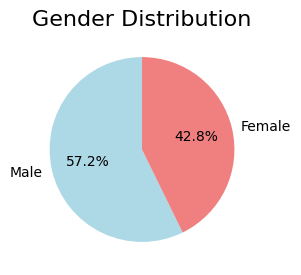

In [ ]:
plt.figure(figsize=(3, 3))
gender_counts = lifestyle_sleep_data['Gender'].value_counts()

plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'],
        startangle=90)

plt.title('Gender Distribution', fontsize=16)

plt.show()

Видим, что датасет содержит больше представителей мужского пола, чем женского. Однако разница невелика.

Далее проанализируем качество сна у представителей мужского и женского пола.

In [ ]:
columns=lifestyle_sleep_data.columns #show names of columns
print(columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


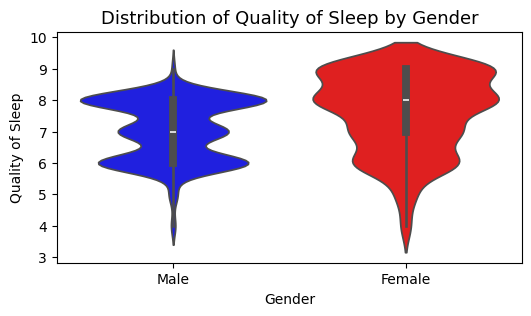

In [ ]:
color_palette = {'Male': 'blue', 'Female': 'red'}
plt.figure(figsize=(6, 3))
sns.violinplot(x='Gender', y='Quality of Sleep', data=lifestyle_sleep_data, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=13)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Quality of Sleep', fontsize=10)
plt.show()

Видим, что у представителей женского пола выше качество сна, чем у мужского.

Проанализируем распределение качества сна от возраста.

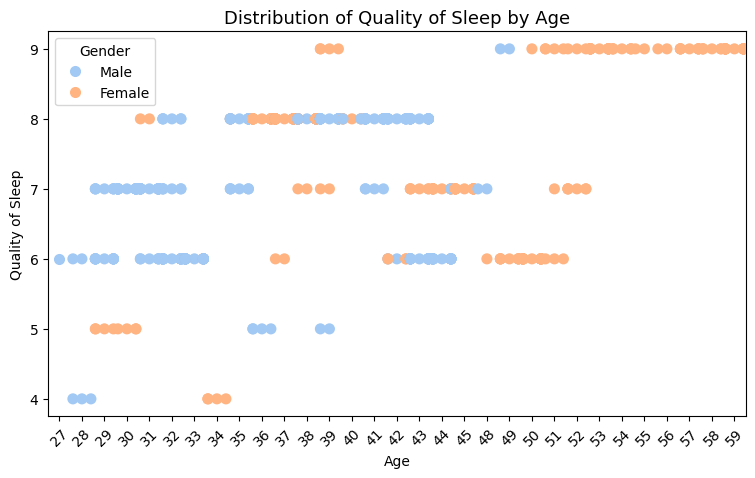

In [ ]:
color_palette = sns.color_palette('pastel')
plt.figure(figsize=(9, 5))
sns.swarmplot(x='Age',
              y='Quality of Sleep',
              hue='Gender',
              data=lifestyle_sleep_data,
              palette=color_palette,
              size=8)
plt.title('Distribution of Quality of Sleep by Age', fontsize=13)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Quality of Sleep', fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.show()

Видим, что качество сна растет с увеличением возраста.



Проанализируем распределение качества сна от уровня физической активности.

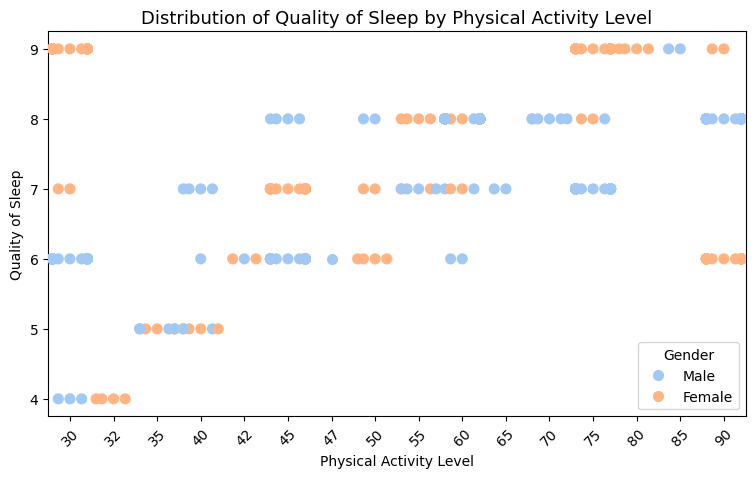

In [ ]:
color_palette = sns.color_palette('pastel')
plt.figure(figsize=(9, 5))
sns.swarmplot(x='Physical Activity Level',
              y='Quality of Sleep',
              hue='Gender',
              data=lifestyle_sleep_data,
              palette=color_palette,
              size=8)
plt.title('Distribution of Quality of Sleep by Physical Activity Level', fontsize=13)
plt.xlabel('Physical Activity Level', fontsize=10)
plt.ylabel('Quality of Sleep', fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.show()

Видим, что качество сна растет с увеличением уровня физической активности.

Построим график распределения продолжительности сна.

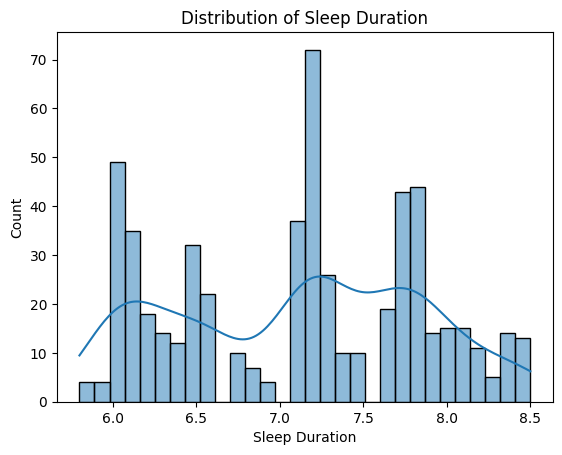

In [ ]:
sns.histplot(lifestyle_sleep_data['Sleep Duration'], bins=30, kde=True)
plt.title('Distribution of Sleep Duration')
plt.show()

Наиболее встречаемый показатель продолжительности сна - 7.2 ч/день.

Построим распределение уровней стресса.

In [ ]:
fig = px.pie(lifestyle_sleep_data,
             names='Stress Level',
             title='Distribution of Stress Level')
fig.show()

Видим, что имеется 6 различных значений уровня стресса, нет явного преобладания какого-либо из уровней стресса.

Проанализируем распределение уровня стресса от возраста.

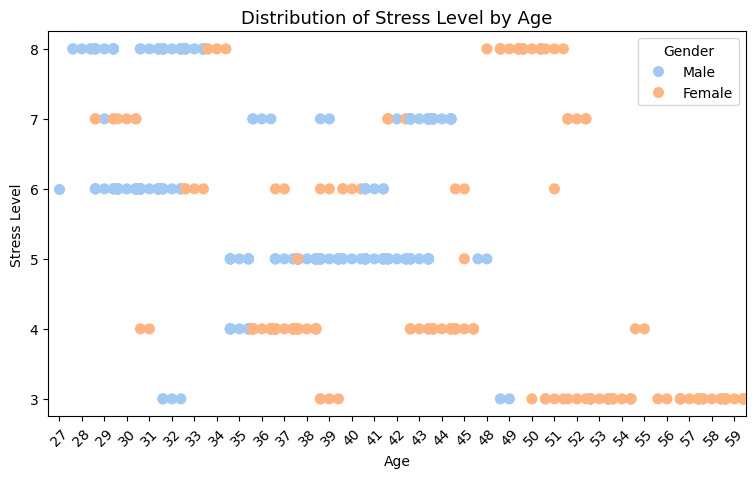

In [ ]:
color_palette = sns.color_palette('pastel')
plt.figure(figsize=(9, 5))
sns.swarmplot(x='Age',
              y='Stress Level',
              hue='Gender',
              data=lifestyle_sleep_data,
              palette=color_palette,
              size=8)
plt.title('Distribution of Stress Level by Age', fontsize=13)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Stress Level', fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.show()

Видим, что уровень стресса снижается с увеличением возраста.

Проанализируем распределение уровня стресса от уровня физической активности.

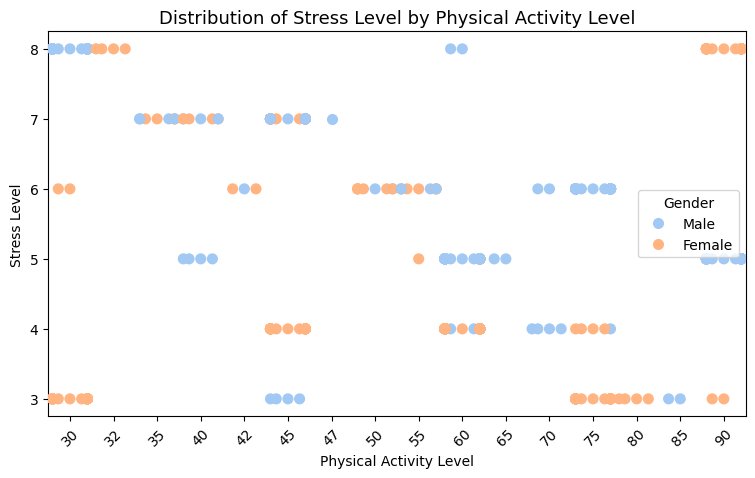

In [ ]:
color_palette = sns.color_palette('pastel')
plt.figure(figsize=(9, 5))
sns.swarmplot(x='Physical Activity Level',
              y='Stress Level',
              hue='Gender',
              data=lifestyle_sleep_data,
              palette=color_palette,
              size=8)
plt.title('Distribution of Stress Level by Physical Activity Level', fontsize=13)
plt.xlabel('Physical Activity Level', fontsize=10)
plt.ylabel('Stress Level', fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.show()

Видим, что уровень стресса снижается с увеличением уровня физической активности.

Построим распределение заболеваний сна по данным датасета.

In [ ]:
fig = px.pie(lifestyle_sleep_data,
             names='Sleep Disorder',
             title='Distribution of Sleep Disorder')
fig.show()

Видим, что на диаграмме преобладает отсутствие заболеваний сна. Лишь 33% людей, информация о которых содержится в датасете, имеют заболевания сна.

#Data preprocessing

Далее мы производим обработку данных, чтобы привести их к одному типу и классифицировать их.

Для начала оценим систолическое и диастолическое давление.
Из медицины нам известно, что идеальным является давление 120/80.
Разобъем всё показатели давления на 2 категории:

1) Давление в пределах нормы (систолическое: 110 - 129, диастолическое: 75 - 84). Тогда в столбец 'Blood Pressure' помещаем '0'.

2) Давление отличается от нормы (давление, не подходящее по пункт 1)). Тогда в столбец 'Blood Pressure' помещаем '1'.

In [ ]:
lifestyle_sleep_data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
lifestyle_sleep_data['Blood Pressure']=lifestyle_sleep_data['Blood Pressure'].apply(lambda x:0 if x in ['126/83','125/80','120/80','117/76','118/76','128/84','129/84','115/75','115/78', '119/77', '121/79','125/82','122/80','118/75'] else 1)

In [ ]:
lifestyle_sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,0,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,0,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,0,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,1,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,1,85,3000,Sleep Apnea


Теперь классифицируем параметры 'Age', 'Heart Rate', 'Daily Steps', 'Sleep Duration' и 'Physical Activity Level'.

In [ ]:
lifestyle_sleep_data["Age"]=pd.cut(lifestyle_sleep_data["Age"],2)
lifestyle_sleep_data["Heart Rate"]=pd.cut(lifestyle_sleep_data["Heart Rate"],4)
lifestyle_sleep_data["Daily Steps"]=pd.cut(lifestyle_sleep_data["Daily Steps"],4)
lifestyle_sleep_data["Sleep Duration"]=pd.cut(lifestyle_sleep_data["Sleep Duration"],3)
lifestyle_sleep_data["Physical Activity Level"]=pd.cut(lifestyle_sleep_data["Physical Activity Level"],4)

Приведем все строковые значения к числовому виду.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    lifestyle_sleep_data[label]=LE.fit_transform(lifestyle_sleep_data[label])

Удаляем ненужный столбец 'Person ID'.

In [ ]:
lifestyle_sleep_data.drop(['Person ID'], axis=1, inplace=True)

Выводим начало преобразованного датасета.

In [ ]:
lifestyle_sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,0,6,0,6,3,0,2,0,1
1,1,0,1,0,6,1,8,0,0,1,3,1
2,1,0,1,0,6,1,8,0,0,1,3,1
3,1,0,6,0,4,0,8,2,1,3,0,2
4,1,0,6,0,4,0,8,2,1,3,0,2


In [ ]:
lifestyle_sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   559 non-null    int64
 1   Age                      559 non-null    int64
 2   Occupation               559 non-null    int64
 3   Sleep Duration           559 non-null    int64
 4   Quality of Sleep         559 non-null    int64
 5   Physical Activity Level  559 non-null    int64
 6   Stress Level             559 non-null    int64
 7   BMI Category             559 non-null    int64
 8   Blood Pressure           559 non-null    int64
 9   Heart Rate               559 non-null    int64
 10  Daily Steps              559 non-null    int64
 11  Sleep Disorder           559 non-null    int64
dtypes: int64(12)
memory usage: 72.9 KB


Видим, что теперь все значения приведены к одному типу.

Определим, какие параметры наиболее сильно влияют на наличие или отсутствие заболеваний сна.

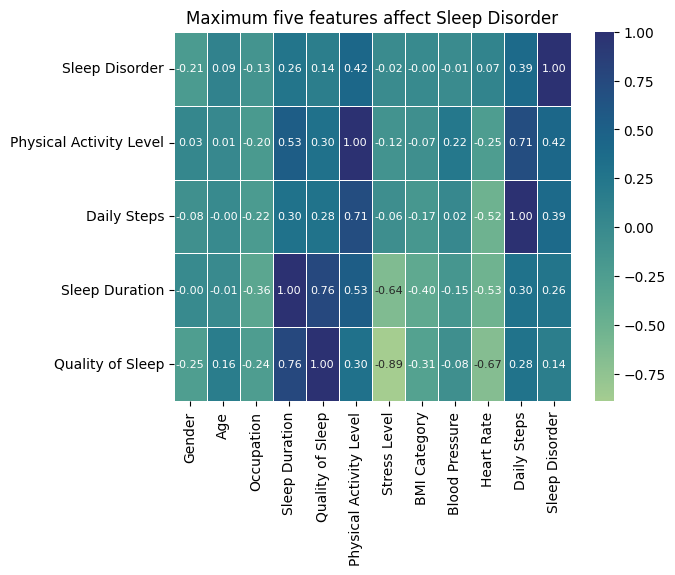

In [ ]:
correlation=lifestyle_sleep_data.corr()
max_5_corr=correlation.nlargest(5,"Sleep Disorder")
sns.heatmap(max_5_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap="crest")
plt.title('Maximum five features affect Sleep Disorder')
plt.show()

#Data spliting

Теперь на нужно разделить наш датасет на тренировочный и тестовый.

In [ ]:
x=lifestyle_sleep_data.iloc[:,:-1]
y=lifestyle_sleep_data.iloc[:,-1]

print('The dimensions of x is : ',x.shape)
print('The dimensions of y is : ',y.shape)

The dimensions of x is :  (559, 11)
The dimensions of y is :  (559,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.50,random_state=32,shuffle=True)

In [ ]:
print("x train dimensions :",x_train.shape)
print("x test dimensions: ",x_test.shape)
print("y train dimensions :",y_train.shape)
print("y test dimensions :",y_test.shape)

x train dimensions : (279, 11)
x test dimensions:  (280, 11)
y train dimensions : (279,)
y test dimensions : (280,)


#Data modeling

Переходим к работе с моделями. Сначала дообучаем их с помощью тренировочного датасета, затем про веряем на тестовом датасете.

##LogisticRegression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)

In [ ]:
LR_training_score=round(LR.score(x_train,y_train)*100,2)
LR_testing_score=round(LR.score(x_test,y_test)*100,2)

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR_y_pred=LR.predict(x_test)

LR training score : 91.4
LR testing score : 91.43


##GradientBoostingClassifier Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [ ]:
GBC_training_score=round(GBC.score(x_train,y_train)*100,2)
GBC_testing_score=round(GBC.score(x_test,y_test)*100,2)

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC_y_pred=GBC.predict(x_test)

GBC training score : 93.55
GBC testing score : 92.86


##SVC Model

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

In [ ]:
svc_training_score=round(svc.score(x_train,y_train)*100,2)
svc_testing_score=round(svc.score(x_test,y_test)*100,2)

print("svc training score :",svc_training_score)
print("svc testing score :",svc_testing_score)

svc_y_pred=svc.predict(x_test)

svc training score : 88.89
svc testing score : 88.93


##RandomForestClassifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(x_train,y_train)

In [ ]:
rfc_training_score=round(rfc.score(x_train,y_train)*100,2)
rfc_testing_score=round(rfc.score(x_test,y_test)*100,2)

print("rfc training score :",rfc_training_score)
print("rfc testing score :",rfc_testing_score)

rfc_y_pred=rfc.predict(x_test)

rfc training score : 93.55
rfc testing score : 92.86


#Results

Для сравнения моделей посторим матрицы ошибок.

In [ ]:
from sklearn.metrics import confusion_matrix

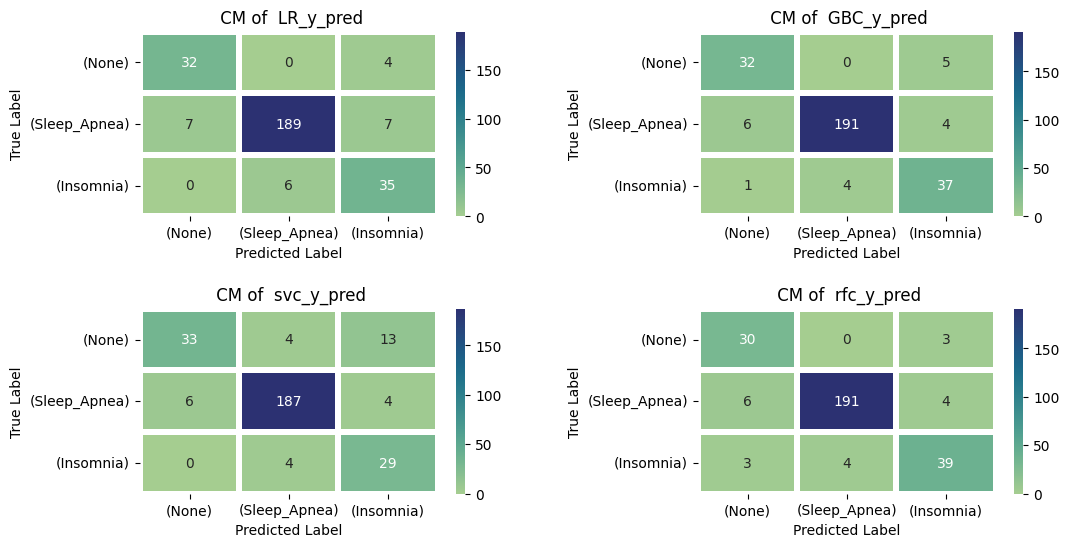

In [ ]:
models_predictions=[LR_y_pred,GBC_y_pred,svc_y_pred, rfc_y_pred]
model={1:'LR_y_pred',2:'GBC_y_pred',3:'svc_y_pred',4:'rfc_y_pred'}


plt.figure(figsize=(12,6))
for i,y_pred in enumerate(models_predictions,1) :

    cm = confusion_matrix(y_pred,y_test)

    plt.subplot(2,2,i)
    sns.heatmap(cm,cmap="crest",linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)